In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sqlalchemy import create_engine
from sklearn import manifold
from sklearn.metrics import silhouette_score

df = pd.read_csv('C:/Users/CEB10210/Downloads/mg_train.csv', header=None)

X=df
# print(X.shape)


In [2]:
kmeans = KMeans(n_clusters=5) #指定分5群
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)  #得到被分群的結果
centroids = kmeans.cluster_centers_  #回傳每一群重心的座標

#統計每群個數

num = [0,0,0,0,0]

for i  in labels:
    if i == 0:
        num[0] += 1
    elif i == 1:
        num[1] += 1
    elif i == 2:
        num[2] += 1
    elif i == 3:
        num[3] += 1
    elif i == 4:
        num[4] += 1
        
print(num)

[265, 72, 7, 181, 49]


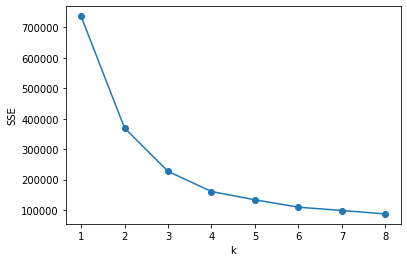

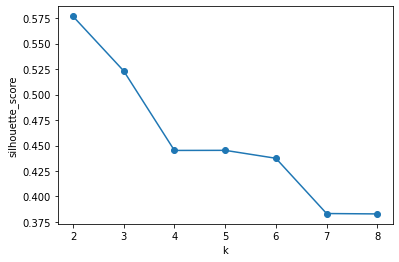

In [3]:
#尋找最佳分群數

#手肘法
SSE = []  
for k in range(1, 9):
    estimator = KMeans(n_clusters=k) 
    estimator.fit(X)
    SSE.append(estimator.inertia_)
X1 = range(1, 9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X1, SSE, 'o-')
plt.show()


#輪廓系数法
Scores = []  # 存放輪廓系数
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  # 構造聚類器
    estimator.fit(X)
    Scores.append(silhouette_score(X, estimator.labels_, metric='euclidean'))
X2 = range(2, 9)
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.plot(X2, Scores, 'o-')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 574 samples in 0.003s...
[t-SNE] Computed neighbors for 574 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 574 / 574
[t-SNE] Mean sigma: 2.773570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.824486
[t-SNE] KL divergence after 1000 iterations: 0.389591


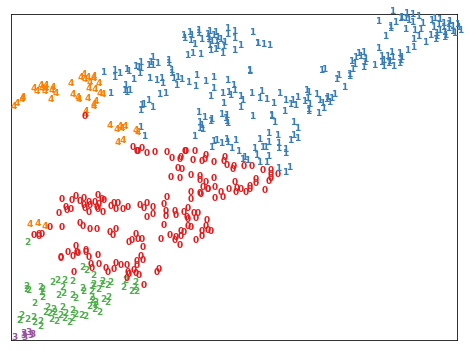

In [9]:
#tsne降維

X_tsne = manifold.TSNE(n_components=2, init='random', verbose=1).fit_transform(X)
kmeans = KMeans(n_clusters=5) 
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)  
centroids = kmeans.cluster_centers_  

#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize
plt.figure(figsize=(8, 6))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(labels[i]), color=plt.cm.Set1(labels[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

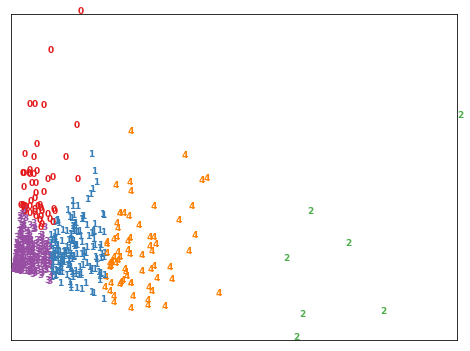

In [7]:
#PCA降維

X_reduced = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=5) 
kmeans = kmeans.fit(X)
labels = kmeans.predict(X) 
centroids = kmeans.cluster_centers_  


#Data Visualization
x_min, x_max = X_reduced.min(0), X_reduced.max(0)
X_norm = (X_reduced - x_min) / (x_max - x_min)  #Normalize
plt.figure(figsize=(8, 6))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(labels[i]), color=plt.cm.Set1(labels[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()